In [1]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
import constants as pc

### a "production" run

In [2]:
# import a code file hydro3.py
import hydro3_mesa_JK as hydro3
args = {'mname':'profile3.data','htype':'zero','piston_eexp':5e50,'v_piston':1e9,'piston_stop':10,'r_outer':1e13,'rmin':1e8,'t_stop':1e7,'noplot':1}
h = hydro3.lagrange_hydro_1d(**args)

### Initial and Boundary Conditions

In [ ]:
h.itype=h.MESA
h.bctype=[h.FALLBACK, h.OUTFLOW]
h.setup_initial_conditions()
h.initialize_boundary_conditions()

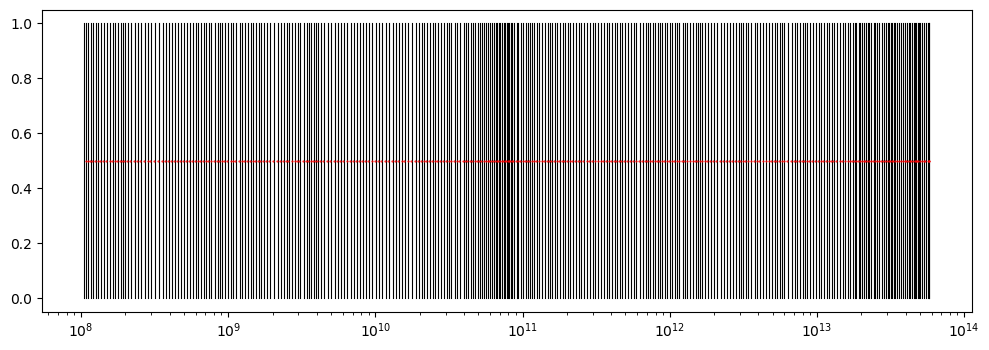

In [4]:
fig = plt.figure(figsize=(12,4), dpi=100)

delta_r = h.zones.r[1: ] - h.zones.r[:-1]
r_zones = h.zones.r[:-1] + delta_r/2.0

for rr in h.zones.r[::2]:
    plt.semilogx(rr+np.zeros(50), np.arange(50)/49.,
                 linestyle='-', linewidth=0.8, color='k')
plt.semilogx(r_zones[1::2], np.zeros_like(r_zones[1::2])+0.5, 
             marker='o', linestyle='', markersize=0.5, c='red')

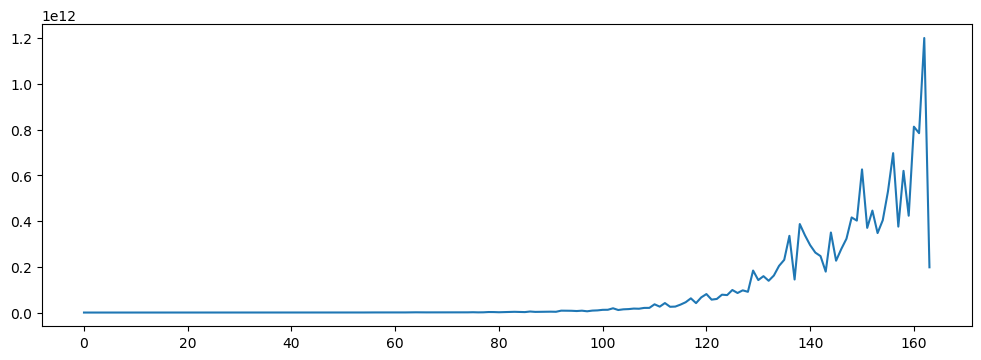

In [5]:
fig = plt.figure(figsize=(12,4), dpi=100)
delta_r = h.zones.r[1:] - h.zones.r[:-1]
plt.plot(delta_r[::4])

Text(0.5, 0, 'radius (cm)')

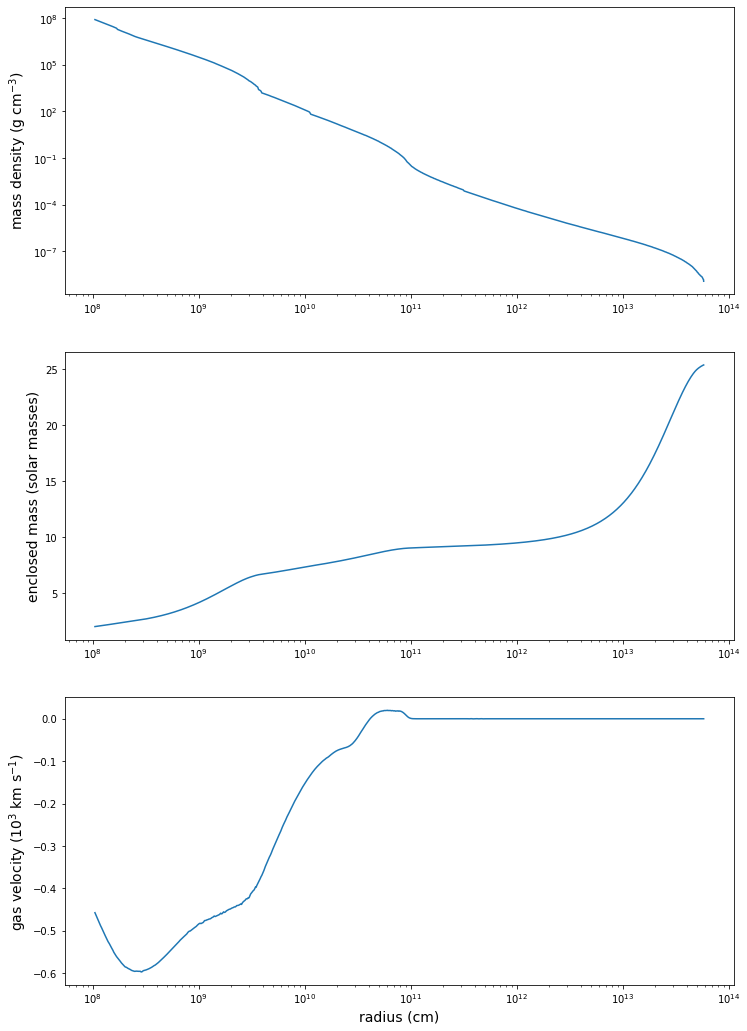

In [6]:
figure, ax = plt.subplots(3, 1, figsize=(12,18))
# Plot Configuration

ax[0].loglog(h.zones.r, h.zones.d)
ax[1].semilogx(h.zones.r, h.zones.mcum/pc.m_sun)
ax[2].semilogx(h.zones.r, h.zones.v/1e8)
    
ax[0].set_ylabel(r'mass density (g cm$^{-3}$)', fontsize=14)
ax[1].set_ylabel(r'enclosed mass (solar masses)',fontsize=14)
ax[2].set_ylabel(r'gas velocity (10$^3$ km s$^{-1}$)',fontsize=14)
ax[2].set_xlabel(r'radius (cm)', fontsize=14)

### Now run the code for $10^6$ s, saving the results at the list of times below. 

In [7]:
times = [1e2,3e2,1e3,
         3e3,1e4,3e4,
         1e5,3e5,1e6]

total = h.run_checkpoint(times)

     0 0.000e+00 1.890e-04
3.987e+33 2.540e+01 1.186e+49 5.889e+51 -7.028e+51 -1.128e+51
   100 1.997e-02 2.001e-04
3.987e+33 2.540e+01 1.326e+49 5.895e+51 -7.054e+51 -1.145e+51
   200 3.990e-02 1.968e-04
4.007e+33 2.540e+01 1.460e+49 5.863e+51 -7.032e+51 -1.154e+51
   300 5.979e-02 1.969e-04
4.027e+33 2.540e+01 1.597e+49 5.835e+51 -7.014e+51 -1.163e+51


/home/jiko1138/astr3400/lab5/hydro3_mesa_JK.py:508: RuntimeWarning: divide by zero encountered in true_divide
  new_d = self.zones.mass/self.zones.vol
/home/jiko1138/astr3400/lab5/hydro3_mesa_JK.py:533: RuntimeWarning: invalid value encountered in multiply
  self.zones.p = (self.gamma - 1)*new_e*new_d


   400 7.959e-02 2.013e-04
4.066e+33 2.540e+01 1.727e+49 5.766e+51 -6.944e+51 -1.161e+51
   500 9.949e-02 1.980e-04
4.086e+33 2.540e+01 1.871e+49 5.742e+51 -6.930e+51 -1.169e+51
   600 1.193e-01 1.988e-04
4.106e+33 2.540e+01 2.014e+49 5.721e+51 -6.918e+51 -1.177e+51
   700 1.390e-01 1.952e-04
4.126e+33 2.540e+01 2.143e+49 5.701e+51 -6.907e+51 -1.185e+51
   800 1.615e-01 2.390e-04
4.146e+33 2.540e+01 2.293e+49 5.686e+51 -6.904e+51 -1.195e+51
   900 1.856e-01 2.458e-04
4.194e+33 2.540e+01 2.437e+49 5.610e+51 -6.824e+51 -1.190e+51
  1000 2.099e-01 2.434e-04
4.219e+33 2.540e+01 2.592e+49 5.590e+51 -6.814e+51 -1.198e+51
  1100 2.341e-01 2.435e-04
4.243e+33 2.540e+01 2.754e+49 5.571e+51 -6.804e+51 -1.206e+51
  1200 2.583e-01 2.405e-04
4.268e+33 2.540e+01 2.908e+49 5.552e+51 -6.795e+51 -1.214e+51
  1300 2.826e-01 2.409e-04
4.292e+33 2.540e+01 3.054e+49 5.535e+51 -6.787e+51 -1.221e+51
  1400 3.067e-01 2.378e-04
4.316e+33 2.540e+01 3.217e+49 5.518e+51 -6.778e+51 -1.228e+51
  1500 3.360e-01 2.90

In [8]:
print(total)

[<hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f54331b5978>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5433067128>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f54330260f0>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5432f814e0>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5432f79390>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f543301af28>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5432fd9a20>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5432fc4b70>, <hydro3_mesa_JK.lagrange_hydro_1d object at 0x7f5432f94978>]


/home/jhub/.conda/envs/hubenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


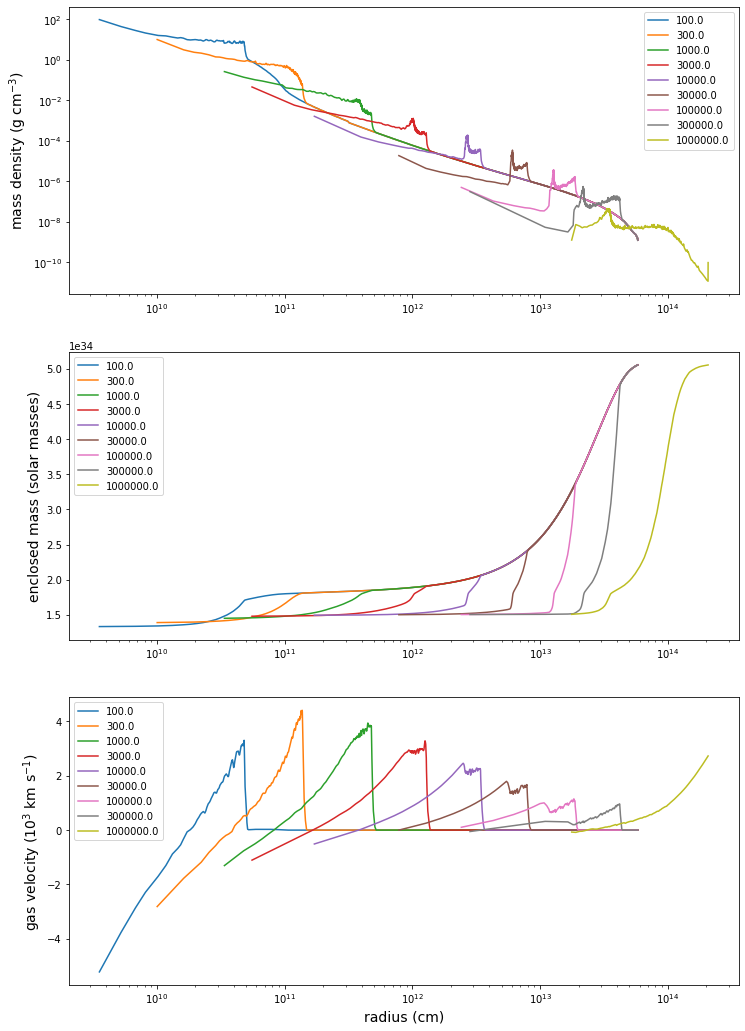

In [9]:

figure, ax = plt.subplots(3, 1, figsize=(12,18))
# Plot Configuration

for n, t in zip(total, times):
    r_n = n.zones.r
    v_n = n.zones.v
    e_n = n.zones.e
    rho_n = n.zones.d
    mcum_n = n.zones.mcum
    p_n = (n.gamma-1.)*e_n*rho_n
    
    ax[0].loglog(r_n, rho_n, label=f'{t}')
    ax[1].semilogx(r_n, mcum_n, label=f'{t}')
    ax[2].semilogx(r_n, v_n/1e8, label=f'{t}')
    
    ax[0].set_ylabel(r'mass density (g cm$^{-3}$)', fontsize=14)
    ax[1].set_ylabel(r'enclosed mass (solar masses)',fontsize=14)
    ax[2].set_ylabel(r'gas velocity (10$^3$ km s$^{-1}$)',fontsize=14)
    ax[2].set_xlabel(r'radius (cm)', fontsize=14)
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()